## Sub-task 2: Dimensionality Reduction

In [20]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# File path
file_path = r"dataset\kc_house_data.csv"

# Read the data from the CSV file
df = pd.read_csv(file_path)

# Check the number of data points in the data set
print("Number of data points in the data set: ", len(df))

Number of data points in the data set:  21613


In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Sol

In [8]:
# Apply PCA to reduce the data to three dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

In [15]:
pca_df.head()

,PC1,PC2,PC3
0,-318402.901668,-7916.992087,-1417.839955
1,-2293.365070,-9343.337410,-578.507135
2,-360239.811120,-2439.909306,-1449.158702
3,63659.167823,-13393.241815,-1795.884715
4,-30286.034614,-8348.196053,-1103.350521


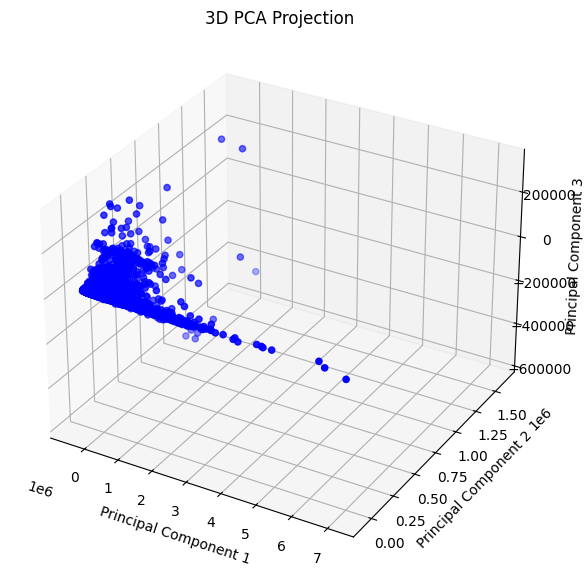

In [9]:
# Plot the three-dimensional projection
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='blue', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Projection')
plt.show()

In [10]:
# Evaluate the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total explained variance: {explained_variance.sum()}')

Explained variance by each component: [0.98221841 0.01570301 0.00206788]
Total explained variance: 0.9999892989104366


### StatQuest Sol

In [24]:
# preprocessing data

## scaled_data = preprocessing.scale(df.T)

# Transposed data as the data is present in columns
scaled_data = StandardScaler().fit_transform(df.T)
scaled_data

array([[ 3.86655359,  4.17362907,  3.69957059, ...,  4.11960179,
         4.11879109,  4.05717329],
       [-0.33582423, -0.28885544, -0.35857236, ..., -0.29379161,
        -0.29515772, -0.30408736],
       [-0.33586211, -0.28886166, -0.35859491, ..., -0.29380533,
        -0.29516324, -0.30410413],
       ...,
       [-0.3381964 , -0.28989491, -0.36137326, ..., -0.2951559 ,
        -0.29653785, -0.30575537],
       [-0.31050357, -0.2748624 , -0.29729372, ..., -0.28261815,
        -0.27963154, -0.29042646],
       [-0.22887899, -0.22551766, -0.17685572, ..., -0.27178495,
        -0.28098884, -0.28590414]])

In [ ]:
# Applying PCA to the scaled data
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

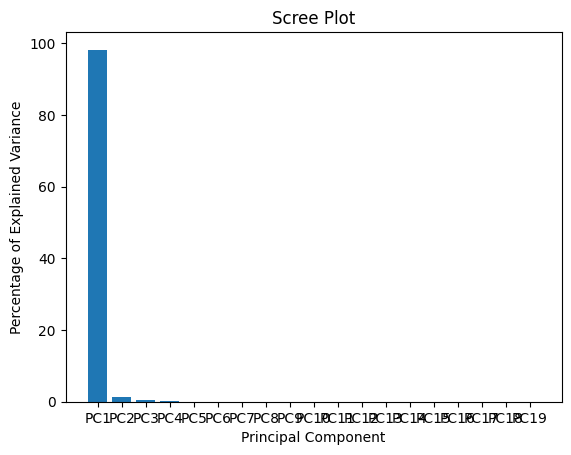

In [26]:
# Plotting the scree graph to find which component to keep
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) # calculating the percentage of variance that each PC accounts for
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] # creating labels for the scree plot

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

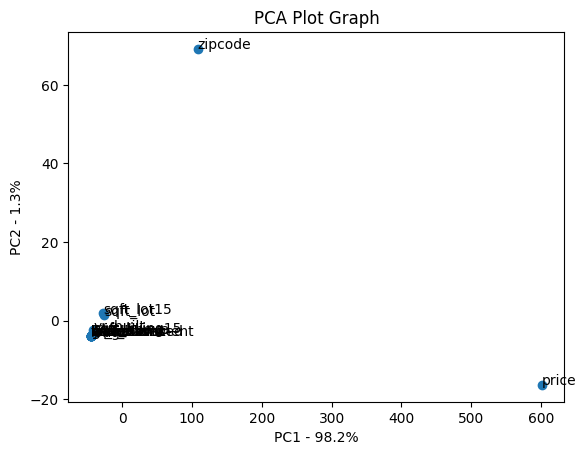

In [30]:
# Plotting the PCA plot
pca_df = pd.DataFrame(pca_data, index=df.columns, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Plot Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [33]:
loading_scores = pd.Series(pca.components_[0], index=df.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_features = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_features])

AttributeError: 'DataFrame' object has no attribute 'components_'

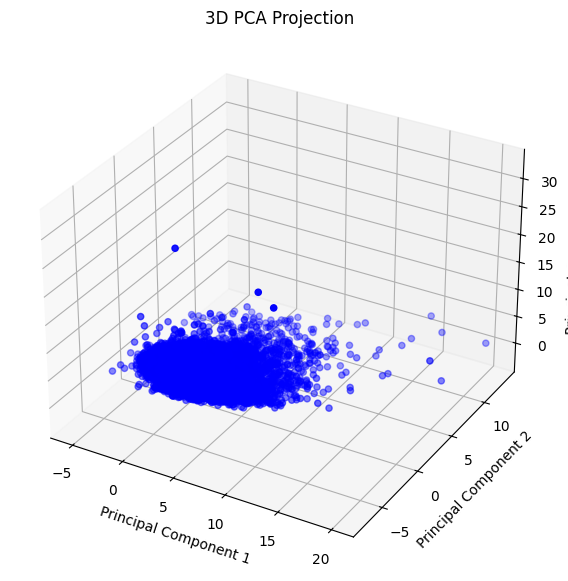

Explained variance by each component: [0.2987057  0.12710931 0.09711019]
Total explained variance: 0.5229252005136747
sqft_living      0.387681
sqft_above       0.376882
grade            0.360334
bathrooms        0.348644
sqft_living15    0.345326
price            0.298965
bedrooms         0.234539
floors           0.218493
yr_built         0.216976
long             0.158592
dtype: float64


In [36]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Apply PCA to reduce the data to three dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Plot the three-dimensional projection
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='blue', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Projection')
plt.show()

# Evaluate the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total explained variance: {explained_variance.sum()}')

# Get the loading scores for the first principal component
loading_scores = pd.Series(pca.components_[0], index=df.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_features = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_features])